In [1]:
import os
import pandas as pd

# Path to your dataset folder
base_path = r"C:\Users\user\Downloads\20_newsgroups"

# 1. List all newsgroup folders
print("Newsgroup folders found:")
folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]
for folder in sorted(folders):
    print(" -", folder)

print("\nTotal folders:", len(folders))

Newsgroup folders found:
 - alt.atheism
 - comp.graphics
 - comp.os.ms-windows.misc
 - comp.sys.ibm.pc.hardware
 - comp.sys.mac.hardware
 - comp.windows.x
 - misc.forsale
 - rec.autos
 - rec.motorcycles
 - rec.sport.baseball
 - rec.sport.hockey
 - sci.crypt
 - sci.electronics
 - sci.med
 - sci.space
 - soc.religion.christian
 - talk.politics.guns
 - talk.politics.mideast
 - talk.politics.misc
 - talk.religion.misc

Total folders: 20


In [3]:
file_summary = []

for folder in sorted(folders):
    folder_path = os.path.join(base_path, folder)
    files = os.listdir(folder_path)

    print(f"\n Folder: {folder}")
    print("   Number of files:", len(files))
    
    for filename in files[:5]:  # show only first 5 files for preview
        file_path = os.path.join(folder_path, filename)
        # Detect file type by extension
        ext = os.path.splitext(filename)[1].lower()
        
        print(f"    → {filename} (type: '{ext if ext else 'no extension'}')")

    file_summary.append({
        "newsgroup": folder,
        "num_files": len(files)
    })


 Folder: alt.atheism
   Number of files: 1000
    → 49960 (type: 'no extension')
    → 51060 (type: 'no extension')
    → 51119 (type: 'no extension')
    → 51120 (type: 'no extension')
    → 51121 (type: 'no extension')

 Folder: comp.graphics
   Number of files: 1000
    → 37261 (type: 'no extension')
    → 37913 (type: 'no extension')
    → 37914 (type: 'no extension')
    → 37915 (type: 'no extension')
    → 37916 (type: 'no extension')

 Folder: comp.os.ms-windows.misc
   Number of files: 1000
    → 10000 (type: 'no extension')
    → 10001 (type: 'no extension')
    → 10002 (type: 'no extension')
    → 10003 (type: 'no extension')
    → 10004 (type: 'no extension')

 Folder: comp.sys.ibm.pc.hardware
   Number of files: 1000
    → 58343 (type: 'no extension')
    → 58826 (type: 'no extension')
    → 58827 (type: 'no extension')
    → 58828 (type: 'no extension')
    → 58829 (type: 'no extension')

 Folder: comp.sys.mac.hardware
   Number of files: 1000
    → 50418 (type: 'no exten

In [4]:
df_summary = pd.DataFrame(file_summary)
df_summary = df_summary.sort_values("newsgroup")

print("\n Document count per newsgroup:")
print(df_summary)

print("\nTotal number of documents:", df_summary["num_files"].sum())


 Document count per newsgroup:
                   newsgroup  num_files
0                alt.atheism       1000
1              comp.graphics       1000
2    comp.os.ms-windows.misc       1000
3   comp.sys.ibm.pc.hardware       1000
4      comp.sys.mac.hardware       1000
5             comp.windows.x       1000
6               misc.forsale       1000
7                  rec.autos       1000
8            rec.motorcycles       1000
9         rec.sport.baseball       1000
10          rec.sport.hockey       1000
11                 sci.crypt       1000
12           sci.electronics       1000
13                   sci.med       1000
14                 sci.space       1000
15    soc.religion.christian        997
16        talk.politics.guns       1000
17     talk.politics.mideast       1000
18        talk.politics.misc       1000
19        talk.religion.misc       1000

Total number of documents: 19997


In [5]:
import os
import pandas as pd
import re

base_path = r"C:\Users\Dinesh\Downloads\20_newsgroups"

documents = []

def parse_document(text):
    """
    Extract Subject and Body from each file.
    """

    # Extract Subject header
    subject_match = re.search(r"^Subject:\s*(.*)", text, re.MULTILINE | re.IGNORECASE)
    subject = subject_match.group(1).strip() if subject_match else ""

    # Remove all headers (anything before first blank line)
    body = re.split(r"\n\s*\n", text, maxsplit=1)
    body = body[1] if len(body) > 1 else text

    return subject, body


# Loop through all folders and files
for group in sorted(os.listdir(base_path)):
    group_path = os.path.join(base_path, group)
    
    if os.path.isdir(group_path):
        for filename in os.listdir(group_path):
            file_path = os.path.join(group_path, filename)

            try:
                with open(file_path, "r", encoding="latin1", errors="ignore") as f:
                    text = f.read()
            except:
                continue

            subject, body = parse_document(text)

            documents.append({
                "newsgroup": group,
                "subject": subject,
                "body": body,
                "full_text": text,
                "file_path": file_path
            })

df = pd.DataFrame(documents)

print("Dataset loaded successfully!")
print(df.head())
print("\nTotal rows:", len(df))


Dataset loaded successfully!
     newsgroup                                            subject  \
0  alt.atheism                 Alt.Atheism FAQ: Atheist Resources   
1  alt.atheism           Alt.Atheism FAQ: Introduction to Atheism   
2  alt.atheism                                  Re: Gospel Dating   
3  alt.atheism  Re: university violating separation of church/...   
4  alt.atheism  Re: [soc.motss, et al.] "Princeton axes matchi...   

                                                body  \
0  Archive-name: atheism/resources\nAlt-atheism-a...   
1  Archive-name: atheism/introduction\nAlt-atheis...   
2  In article <65974@mimsy.umd.edu>\nmangoe@cs.um...   
3  dmn@kepler.unh.edu (...until kings become phil...   
4  In article <N4HY.93Apr5120934@harder.ccr-p.ida...   

                                           full_text  \
0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...   
1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   
2  Newsgroups: alt.atheism\nPath: cantaloupe.srv...

In [6]:
import string

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"\d+", " ", text)  # remove digits
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

df["clean_text"] = df["body"].apply(clean_text)

print(df[["newsgroup", "subject", "clean_text"]].head())

     newsgroup                                            subject  \
0  alt.atheism                 Alt.Atheism FAQ: Atheist Resources   
1  alt.atheism           Alt.Atheism FAQ: Introduction to Atheism   
2  alt.atheism                                  Re: Gospel Dating   
3  alt.atheism  Re: university violating separation of church/...   
4  alt.atheism  Re: [soc.motss, et al.] "Princeton axes matchi...   

                                          clean_text  
0  archivename atheismresources altatheismarchive...  
1  archivename atheismintroduction altatheismarch...  
2  in article mimsyumdedu mangoecsumdedu charley ...  
3  dmnkeplerunhedu until kings become philosopher...  
4  in article n hy apr harderccrpidaorg n hyharde...  


In [7]:
print(df["newsgroup"].value_counts())
df["body_length"] = df["body"].str.len()

print("\nAverage document length:", df["body_length"].mean())
print("Longest document length:", df["body_length"].max())
print("Shortest document length:", df["body_length"].min())

import random
i = random.randint(0, len(df)-1)

print("Newsgroup:", df.iloc[i]["newsgroup"])
print("Subject:", df.iloc[i]["subject"])
print("\nSample Body:\n")
print(df.iloc[i]["body"][:1000])  


newsgroup
alt.atheism                 1000
comp.graphics               1000
comp.os.ms-windows.misc     1000
comp.sys.ibm.pc.hardware    1000
comp.sys.mac.hardware       1000
comp.windows.x              1000
misc.forsale                1000
rec.autos                   1000
rec.motorcycles             1000
rec.sport.baseball          1000
rec.sport.hockey            1000
sci.crypt                   1000
sci.electronics             1000
sci.med                     1000
sci.space                   1000
talk.politics.guns          1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.religion.misc          1000
soc.religion.christian       997
Name: count, dtype: int64

Average document length: 1715.998849827474
Longest document length: 160471
Shortest document length: 0
Newsgroup: sci.space
Subject: What if the USSR had reached the Moon first?

Sample Body:

Suppose the Soviets had managed to get their moon rocket working
and had made it first.  They could have beate

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    stop_words='english',      
    max_df=0.7,                
    min_df=5,                  
    max_features=50000,        
    ngram_range=(1, 2)        
)

# Fit and transform the clean text column
X_tfidf = tfidf.fit_transform(df["clean_text"])

print("TF-IDF matrix shape:", X_tfidf.shape)
print("Vocabulary size:", len(tfidf.vocabulary_))


TF-IDF matrix shape: (19997, 50000)
Vocabulary size: 50000


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode newsgroup labels into integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["newsgroup"])

print("Label classes:")
print(label_encoder.classes_)

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,               
    y,                   
    test_size=0.2,        
    random_state=42,      
    stratify=y            
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Label classes:
['alt.atheism' 'comp.graphics' 'comp.os.ms-windows.misc'
 'comp.sys.ibm.pc.hardware' 'comp.sys.mac.hardware' 'comp.windows.x'
 'misc.forsale' 'rec.autos' 'rec.motorcycles' 'rec.sport.baseball'
 'rec.sport.hockey' 'sci.crypt' 'sci.electronics' 'sci.med' 'sci.space'
 'soc.religion.christian' 'talk.politics.guns' 'talk.politics.mideast'
 'talk.politics.misc' 'talk.religion.misc']
Train shape: (15997, 50000)
Test shape: (4000, 50000)


In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print(" Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report (Naive Bayes):\n")
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))

 Naive Bayes Accuracy: 0.8385

Classification Report (Naive Bayes):

                          precision    recall  f1-score   support

             alt.atheism       0.70      0.71      0.71       200
           comp.graphics       0.70      0.79      0.74       200
 comp.os.ms-windows.misc       0.82      0.76      0.79       200
comp.sys.ibm.pc.hardware       0.78      0.82      0.80       200
   comp.sys.mac.hardware       0.89      0.86      0.88       200
          comp.windows.x       0.83      0.88      0.85       200
            misc.forsale       0.87      0.77      0.81       200
               rec.autos       0.88      0.85      0.87       200
         rec.motorcycles       0.97      0.96      0.97       200
      rec.sport.baseball       0.96      0.96      0.96       200
        rec.sport.hockey       0.96      0.97      0.97       200
               sci.crypt       0.89      0.94      0.92       200
         sci.electronics       0.85      0.83      0.84       200
      

In [11]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(" Linear SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report (Linear SVM):\n")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

 Linear SVM Accuracy: 0.85875

Classification Report (Linear SVM):

                          precision    recall  f1-score   support

             alt.atheism       0.74      0.70      0.72       200
           comp.graphics       0.80      0.84      0.82       200
 comp.os.ms-windows.misc       0.85      0.81      0.83       200
comp.sys.ibm.pc.hardware       0.82      0.76      0.79       200
   comp.sys.mac.hardware       0.87      0.89      0.88       200
          comp.windows.x       0.88      0.92      0.90       200
            misc.forsale       0.78      0.84      0.81       200
               rec.autos       0.92      0.86      0.89       200
         rec.motorcycles       0.95      0.95      0.95       200
      rec.sport.baseball       0.95      0.96      0.96       200
        rec.sport.hockey       0.98      0.97      0.98       200
               sci.crypt       0.95      0.94      0.95       200
         sci.electronics       0.82      0.89      0.85       200
       

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print(" KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report (KNN):\n")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

 KNN Accuracy: 0.7905

Classification Report (KNN):

                          precision    recall  f1-score   support

             alt.atheism       0.66      0.71      0.68       200
           comp.graphics       0.62      0.83      0.71       200
 comp.os.ms-windows.misc       0.66      0.75      0.70       200
comp.sys.ibm.pc.hardware       0.66      0.71      0.68       200
   comp.sys.mac.hardware       0.76      0.71      0.74       200
          comp.windows.x       0.81      0.80      0.80       200
            misc.forsale       0.72      0.69      0.70       200
               rec.autos       0.82      0.78      0.80       200
         rec.motorcycles       0.91      0.89      0.90       200
      rec.sport.baseball       0.91      0.93      0.92       200
        rec.sport.hockey       0.91      0.94      0.93       200
               sci.crypt       0.89      0.94      0.91       200
         sci.electronics       0.82      0.74      0.78       200
                 sci.m

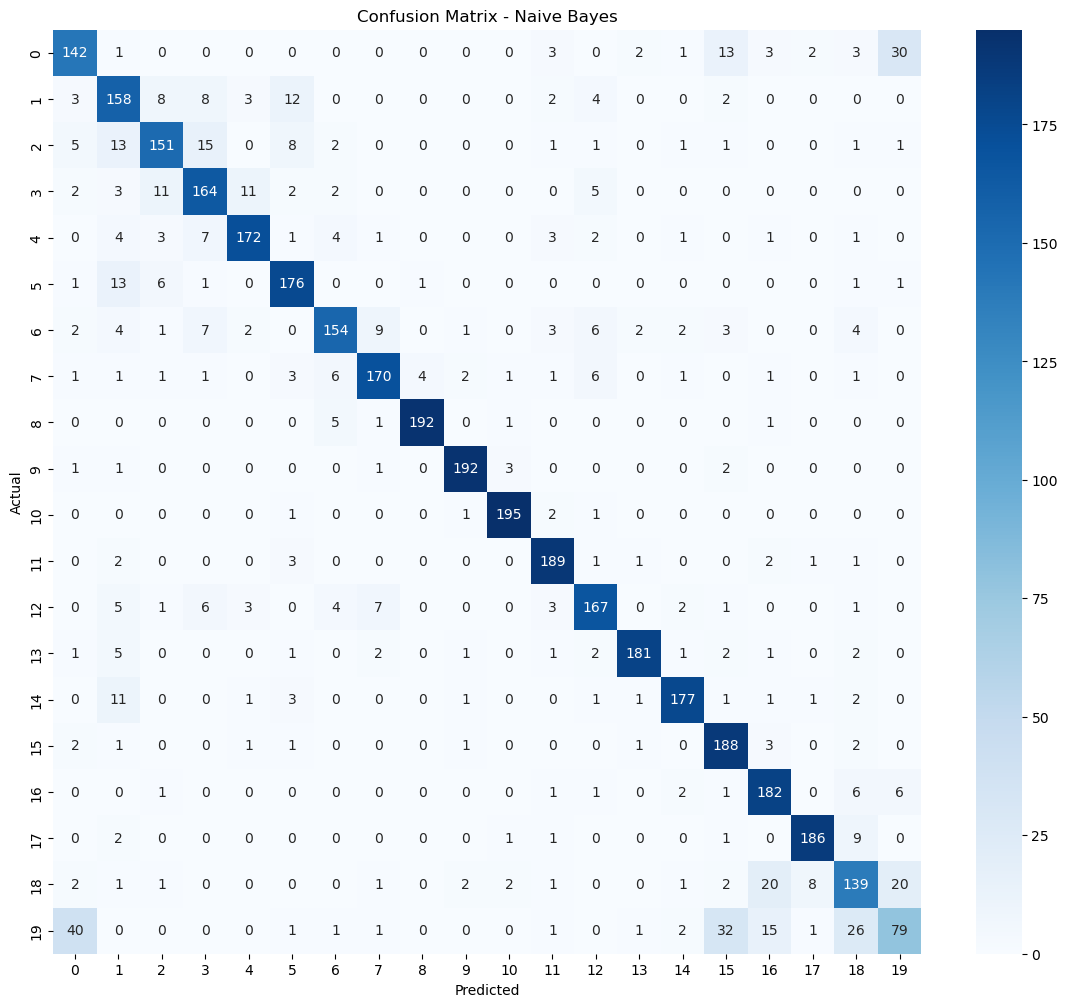

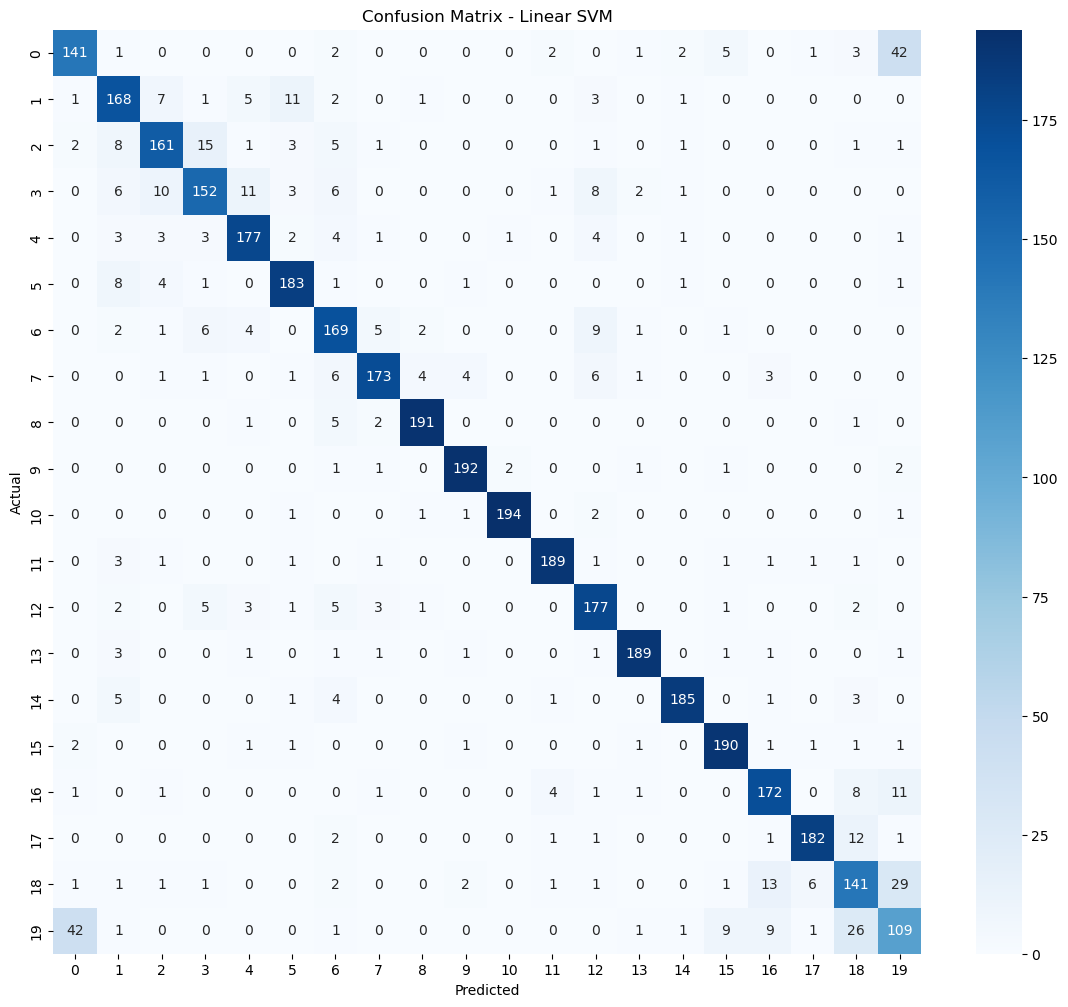

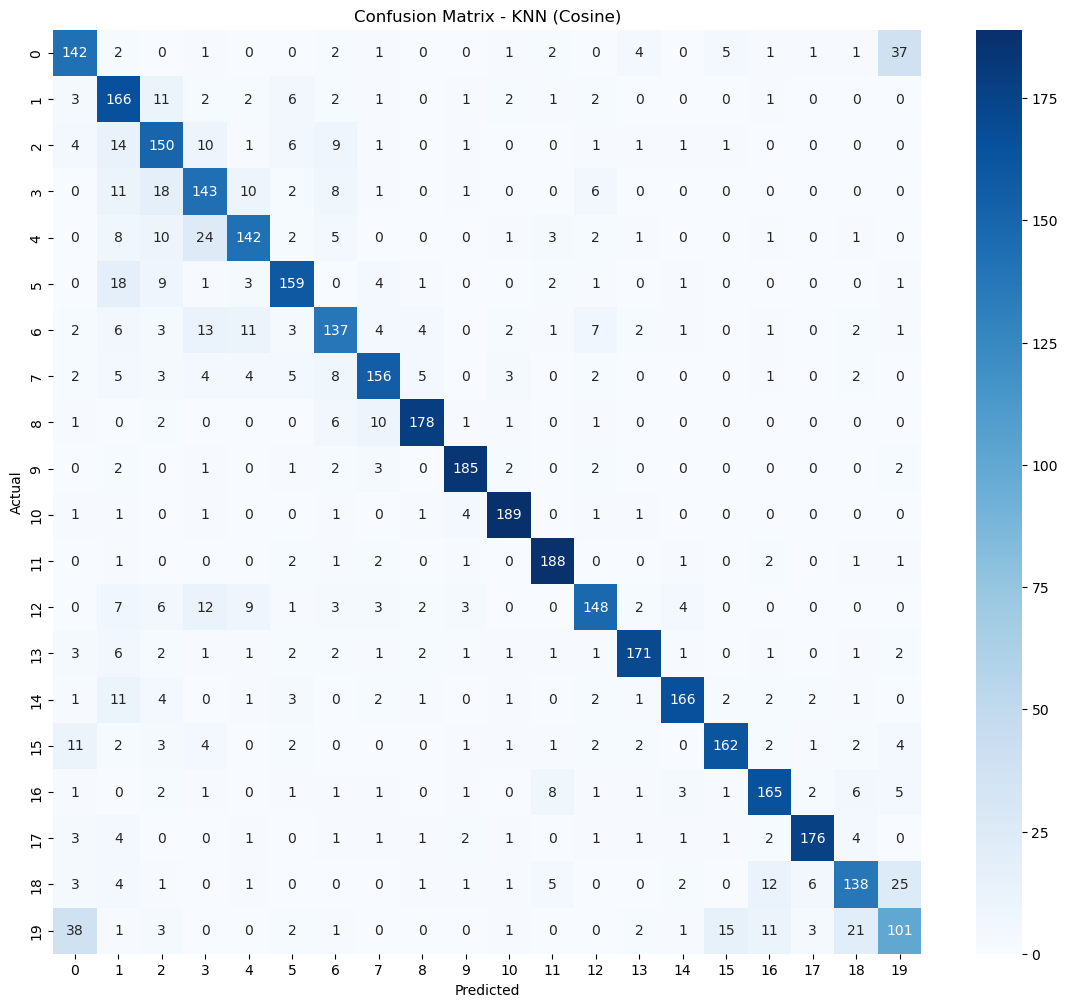

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(14, 12))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')  # <-- values added here
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot for Naive Bayes
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")

# Plot for Linear SVM
plot_confusion_matrix(y_test, y_pred_svm, "Linear SVM")

# Plot for KNN
plot_confusion_matrix(y_test, y_pred_knn, "KNN (Cosine)")